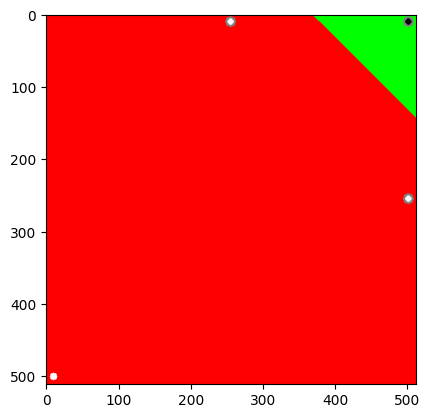

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Set up training data
## [setup1]
labels = np.array([1, -1, -1, -1])
trainingData = np.matrix([[501, 10], [255, 10], [501, 255], [10, 501]], dtype=np.float32)
## [setup1]

# Train the SVM
## [init]
svm = cv.ml.SVM_create()
svm.setType(cv.ml.SVM_C_SVC)
svm.setKernel(cv.ml.SVM_LINEAR)
svm.setTermCriteria((cv.TERM_CRITERIA_MAX_ITER, 100, 1e-6))
## [init]
## [train]
svm.train(trainingData, cv.ml.ROW_SAMPLE, labels)
## [train]

# Data for visual representation
width = 512
height = 512
image = np.zeros((height, width, 3), dtype=np.uint8)

# Show the decision regions given by the SVM
## [show]
green = (0,255,0)
blue = (255,0,0)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        sampleMat = np.matrix([[j,i]], dtype=np.float32)
        response = svm.predict(sampleMat)[1]

        if response == 1:
            image[i,j] = green
        elif response == -1:
            image[i,j] = blue
## [show]

# Show the training data
## [show_data]
thickness = -1
cv.circle(image, (501,  10), 5, (  0,   0,   0), thickness)
cv.circle(image, (255,  10), 5, (255, 255, 255), thickness)
cv.circle(image, (501, 255), 5, (255, 255, 255), thickness)
cv.circle(image, ( 10, 501), 5, (255, 255, 255), thickness)
## [show_data]

# Show support vectors
## [show_vectors]
thickness = 2
sv = svm.getUncompressedSupportVectors()

for i in range(sv.shape[0]):
    cv.circle(image, (int(sv[i,0]), int(sv[i,1])), 6, (128, 128, 128), thickness)
## [show_vectors]


plt.imshow(image) # show it to the user
plt.show()